In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import random
import cv2
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model

IMG_DIMS = (96, 96, 3)
NUM_CLASSES = 2
BATCH_SIZE = 64
EPOCHS = 80
LEARNING_RATE = 1e-3

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = []
labels = []

images_path = '/kaggle/input/cifake-real-and-ai-generated-synthetic-images/train'

fake_path = os.path.join(images_path, 'FAKE')
real_path = os.path.join(images_path, 'REAL')

fake_files = [os.path.join(fake_path, f) for f in os.listdir(fake_path) if os.path.isfile(os.path.join(fake_path, f))]
real_files = [os.path.join(real_path, f) for f in os.listdir(real_path) if os.path.isfile(os.path.join(real_path, f))]

image_files = fake_files + real_files
random.shuffle(image_files)

counter = 0
for img in image_files:
    
    if counter >= 12000:
        break
    image = cv2.imread(img)
    
    image = cv2.resize(image, (IMG_DIMS[0],IMG_DIMS[1]))
    image = img_to_array(image)
    data.append(image)

    label = img.split(os.path.sep)[-2] 
    if label == "REAL":
        label = 1
    else:
        label = 0
    counter += 1
    labels.append([label])


In [3]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.3,
                                                  random_state=101)

trainY = to_categorical(trainY, num_classes=2) 
testY = to_categorical(testY, num_classes=2)


In [4]:

def build_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), padding="same", input_shape=IMG_DIMS),
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(3, 3)),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Conv2D(64, (3, 3), padding="same"),
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.Conv2D(64, (3, 3), padding="same"),
#         tf.keras.layers.Activation("relu"),
#         tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Conv2D(128, (3, 3), padding="same"),
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, (3, 3), padding="same"),
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024),
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(NUM_CLASSES),
        tf.keras.layers.Activation("softmax")
    ])
    return model

In [5]:
from tensorflow.keras.losses import CategoricalCrossentropy

cce_loss = CategoricalCrossentropy()

model = build_model()

model.compile(optimizer='adam', loss=cce_loss, metrics=['accuracy'])

model.fit(trainX, trainY, batch_size=64, 
          validation_data=(testX,testY),
          steps_per_epoch=len(trainX) // BATCH_SIZE,
          epochs=EPOCHS, verbose=1)

Epoch 1/80


2023-05-10 18:52:36.474378: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


131/131 [==============================] - 14s 32ms/step - loss: 0.6792 - accuracy: 0.7554 - val_loss: 0.7485 - val_accuracy: 0.5058
Epoch 2/80
131/131 [==============================] - 3s 25ms/step - loss: 0.3841 - accuracy: 0.8408 - val_loss: 0.9623 - val_accuracy: 0.4792
Epoch 3/80
131/131 [==============================] - 3s 24ms/step - loss: 0.3098 - accuracy: 0.8697 - val_loss: 0.6193 - val_accuracy: 0.6889
Epoch 4/80
131/131 [==============================] - 3s 25ms/step - loss: 0.2679 - accuracy: 0.8883 - val_loss: 0.6298 - val_accuracy: 0.7419
Epoch 5/80
131/131 [==============================] - 3s 25ms/step - loss: 0.2496 - accuracy: 0.8954 - val_loss: 0.3242 - val_accuracy: 0.8694
Epoch 6/80
131/131 [==============================] - 3s 27ms/step - loss: 0.2284 - accuracy: 0.9081 - val_loss: 0.2644 - val_accuracy: 0.8939
Epoch 7/80
131/131 [==============================] - 3s 25ms/step - loss: 0.2064 - accuracy: 0.9169 - val_loss: 0.2439 - val_accuracy: 0.9025
Epoch 8/8

<AxesSubplot: >

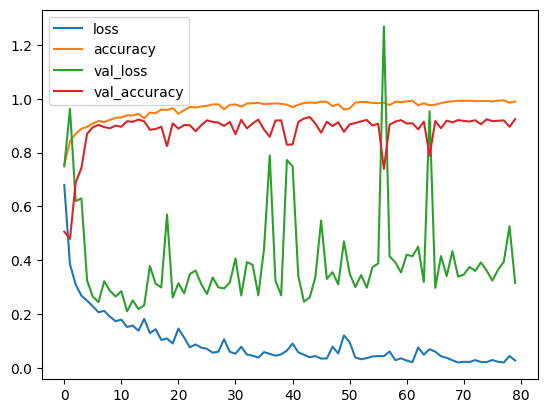

In [6]:
import pandas as pd
loss=pd.DataFrame(model.history.history)
loss.plot()

In [7]:
from sklearn.metrics import classification_report

predictions = model.predict(testX)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(testY, axis=1)


report = classification_report(true_labels, predicted_labels)
print(report)


113/113 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1804
           1       0.91      0.94      0.92      1796

    accuracy                           0.92      3600
   macro avg       0.92      0.92      0.92      3600
weighted avg       0.92      0.92      0.92      3600



In [22]:
datas = []
labelss = []

images_paths = '/kaggle/input/cifake-real-and-ai-generated-synthetic-images/test'

fake_paths = os.path.join(images_paths, 'FAKE')
real_paths = os.path.join(images_paths, 'REAL')

fake_file = [os.path.join(fake_paths, f) for f in os.listdir(fake_paths) if os.path.isfile(os.path.join(fake_paths, f))]
real_file = [os.path.join(real_paths, f) for f in os.listdir(real_paths) if os.path.isfile(os.path.join(real_paths, f))]

image_file = fake_file + real_file
random.shuffle(image_file)

counter = 0
for img in image_files:
    
    if counter >= 1000:
        break
    image = cv2.imread(img)
    
    image = cv2.resize(image, (IMG_DIMS[0],IMG_DIMS[1]))
    image = img_to_array(image)
    datas.append(image)

    label = img.split(os.path.sep)[-2] 
    if label == "REAL":
        label = 1
    else:
        label = 0
    counter += 1
    labelss.append([label])


In [23]:
datas = np.array(datas, dtype="float") / 255.0
labelss = np.array(labelss)
# labelss = to_categorical(labelss, num_classes=2)

(TrainX, TestX, TrainY, TestY) = train_test_split(datas, labelss, test_size=0.01,
                                                  random_state=101)
TrainY = to_categorical(TrainY, num_classes=2)

In [24]:
from sklearn.metrics import classification_report

pred = model.predict(TrainX)
pred_label = np.argmax(pred, axis=1)
true_label = np.argmax(TrainY, axis=1)


reports = classification_report(true_label, pred_label)
print(reports)


31/31 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       501
           1       0.97      0.98      0.97       489

    accuracy                           0.97       990
   macro avg       0.97      0.97      0.97       990
weighted avg       0.97      0.97      0.97       990

